In [1]:
import os
import pandas as pd
import glob
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil

In [2]:
base_dir = 'PlantDoc-Dataset-windows-compatible'

In [3]:
#тут уже данные поделены

train_dir=os.path.join(base_dir, 'train')
test_dir=os.path.join(base_dir, 'test')

In [56]:
#shutil.rmtree(os.path.join(train_dir, 'Tomato two spotted spider mites leaf'))

In [4]:
#в test нет одного класса, в train этот класс содержит 2 изображения
#берем классы только из test и забываем про класс из 2 изображений

classes_list = []
for imagePath in os.listdir(test_dir):
	l = imagePath
	classes_list.append(l)

In [5]:
classes_list

['Corn leaf blight',
 'Apple leaf',
 'Soyabean leaf',
 'Blueberry leaf',
 'Tomato leaf',
 'Tomato mold leaf',
 'Raspberry leaf',
 'Apple rust leaf',
 'Tomato Septoria leaf spot',
 'Cherry leaf',
 'Bell_pepper leaf',
 'Tomato leaf late blight',
 'Tomato leaf bacterial spot',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Potato leaf early blight',
 'Squash Powdery mildew leaf',
 'Corn rust leaf',
 'Peach leaf',
 'Potato leaf late blight',
 'grape leaf black rot',
 'grape leaf',
 'Apple Scab Leaf',
 'Bell_pepper leaf spot',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Corn Gray leaf spot']

In [6]:
#это кусок кода был просто тестовый

for lists in os.listdir(train_dir):
    path = os.path.join(train_dir, lists)
    for filename in glob.glob(path+'/*'):
        p_l= lists
        img_class= []
        img_class.append(lists)

img_class

['Corn Gray leaf spot']

In [7]:
#тут если хочешь сам функцию сделай для train и test

with open('plantdoc_mc_annotation.csv', 'w', newline='') as file:
    file.write("id;classes;")
    file.write('\n')
    for lists in os.listdir(train_dir):
        path = os.path.join(train_dir, lists)
        for filename in glob.glob(path+'/*'):
            file.write(os.path.basename(filename))
            file.write(';')
            p_l= lists
            img_class= []
            img_class.append(lists)
            file.write(str(img_class))
            file.write(';')
            file.write('\n')
    for lists in os.listdir(test_dir):
        path = os.path.join(test_dir, lists)
        for filename in glob.glob(path+'/*'):
            file.write(os.path.basename(filename))
            file.write(';')
            p_l= lists
            img_class= []
            img_class.append(lists)
            file.write(str(img_class))
            file.write(';')
            file.write('\n')

In [8]:
classes_list

['Corn leaf blight',
 'Apple leaf',
 'Soyabean leaf',
 'Blueberry leaf',
 'Tomato leaf',
 'Tomato mold leaf',
 'Raspberry leaf',
 'Apple rust leaf',
 'Tomato Septoria leaf spot',
 'Cherry leaf',
 'Bell_pepper leaf',
 'Tomato leaf late blight',
 'Tomato leaf bacterial spot',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Potato leaf early blight',
 'Squash Powdery mildew leaf',
 'Corn rust leaf',
 'Peach leaf',
 'Potato leaf late blight',
 'grape leaf black rot',
 'grape leaf',
 'Apple Scab Leaf',
 'Bell_pepper leaf spot',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Corn Gray leaf spot']

In [9]:
img_metadata = pd.read_csv('plantdoc_mc_annotation.csv',sep=';')
img_metadata = img_metadata.drop('Unnamed: 2', axis=1)
img_metadata['id'] = img_metadata['id'].apply(lambda x: 'plantsdoc/' + x)
img_metadata['classes'] = img_metadata['classes'].apply(lambda x: eval(x))
img_metadata.head()

id             classes
0                   plantsdoc/ga-2015-05-20-nclb.jpg  [Corn leaf blight]
1  plantsdoc/corn-disease-update-fig-1-northern-l...  [Corn leaf blight]
2           plantsdoc/corn-BLS-irregular-lesions.jpg  [Corn leaf blight]
3  plantsdoc/186116-325x209-Northern-Corn-Leaf-Bl...  [Corn leaf blight]
4                   plantsdoc/nclb-2015-n-mcghee.jpg  [Corn leaf blight]

In [10]:
img_metadata.classes

0               [Corn leaf blight]
1               [Corn leaf blight]
2               [Corn leaf blight]
3               [Corn leaf blight]
4               [Corn leaf blight]
                   ...            
2571    [Tomato Early blight leaf]
2572         [Corn Gray leaf spot]
2573         [Corn Gray leaf spot]
2574         [Corn Gray leaf spot]
2575         [Corn Gray leaf spot]
Name: classes, Length: 2576, dtype: object

In [11]:
all_classes = img_metadata['classes'].apply(pd.Series).stack().tolist()

# Извлекаем уникальные классы с помощью set
unique_classes = set(all_classes)

# Если нужно получить результат в виде списка
unique_classes_list = np.array(list(unique_classes))

print(unique_classes_list)

['Corn rust leaf' 'Corn Gray leaf spot' 'Apple rust leaf'
 'Bell_pepper leaf' 'Tomato leaf mosaic virus' 'Potato leaf early blight'
 'Strawberry leaf' 'Raspberry leaf' 'Squash Powdery mildew leaf'
 'Tomato leaf late blight' 'Tomato Septoria leaf spot' 'Corn leaf blight'
 'Tomato Early blight leaf' 'Apple Scab Leaf' 'Tomato leaf'
 'Soyabean leaf' 'grape leaf black rot' 'Tomato leaf bacterial spot'
 'Peach leaf' 'Blueberry leaf' 'Cherry leaf' 'grape leaf'
 'Bell_pepper leaf spot' 'Tomato leaf yellow virus'
 'Potato leaf late blight' 'Tomato mold leaf' 'Apple leaf']


In [12]:
unique_classes_list.shape

(27,)

In [65]:
#тут тоже хочешь сделай функцию если тебя сильно коробит

!mkdir -p plants
destination_directory = 'plantsdoc/'

for lists in tqdm(os.listdir(train_dir)):
    path = os.path.join(train_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)
        
for lists in tqdm(os.listdir(test_dir)):
    path = os.path.join(test_dir, lists)
    for filename in glob.glob(path+'/*'):
        shutil.copy2(filename, destination_directory)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 447.27it/s]


Text(0.5, 1.0, "['Corn leaf blight']")

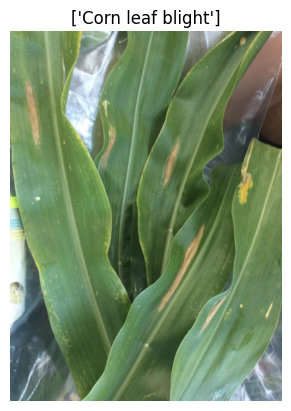

In [13]:
img = plt.imread(img_metadata.id[0])
plt.imshow(img)
plt.axis('off')
plt.title((img_metadata.classes[0]))